# Experiment results for UMN
Analyse Unification Memory Network results on the bAbI and the logical reasoning datasets. We are looking for overall performance as well as how these model learn invariants. This notebook is organised in sections that look at different aspects of the analysis.

In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Disable scientific printing
np.set_printoptions(suppress=True, precision=3, linewidth=180)

Curate the results from raw experiment log files into a single csv file. Each experiment run logs to its on json log file. The json files are an array of dictionary reporting the epoch, loss, accuracy and other metrics that are recorded. The following script reads all the `*_log.json` files and curates them into a single csv. We collate the UMN as well as the baseline IMA results.

In [2]:
%%bash
for type in umn ima; do
  python3 utils/process_logs.py results/"$type"_result/*_log.json > results/"$type"_results.csv
done

In [3]:
# Some utility functions
def filter_by_dict(dataframe, filter_dict):
    """Filters dataframe to match keys and values of the filter_dict."""
    return dataframe.loc[(dataframe[list(filter_dict)] == pd.Series(filter_dict)).all(axis=1)]

# Analyse Unification Memory Network results
In this section, we look at the results from Unification Memory Networks. We will investigate how well they perform overall as well as what are the learnt invariants.

In [4]:
df_umn = pd.read_csv("results/umn_results.csv")
df_umn = df_umn.assign(strong=~df_umn.weak)
assert not df_umn[df_umn.isnull().any(axis=1)].size, "There are rows with null."
df_umn.sample(5)

,elapsed_time,embed,epoch,iteration,main/acc,main/batt,main/loss,main/oacc,main/oatt,main/opred,...,val/main/loss,val/main/oacc,val/main/oatt,val/main/opred,val/main/rpred,val/main/uatt,val/main/uni,val/main/vmap,weak,strong
104619,141493.700496,32,220,6188,0.992188,0.000534,0.031955,0.997210,0.019253,0.017920,...,1.510062,0.623264,0.613236,1.609320,0.000049,0.558719,0.048657,2.541705,False,True
131962,8172.452871,32,263,3699,1.000000,0.009291,0.002699,1.000000,0.017424,0.001260,...,0.002523,1.000000,0.015982,0.001243,0.000724,0.018160,0.003543,0.657642,True,False
52516,1091.005707,32,17,240,0.245833,0.002167,2.006882,0.764583,4.241261,0.741082,...,2.052747,0.630000,4.691482,0.894141,0.397064,1.695793,0.283549,9.500000,True,False
48222,5008.733172,32,223,3136,1.000000,0.000172,0.002724,1.000000,0.000080,0.001359,...,0.003007,1.000000,0.000256,0.001480,0.000735,0.004381,0.015246,0.746236,False,True
93546,52584.681135,32,247,6947,0.983817,3.937143,0.075532,0.985491,2.834724,0.069337,...,0.182204,0.940249,2.847070,0.256038,0.000544,2.965276,0.039230,0.571594,True,False


In [5]:
sorted(df_umn.task.unique())

['data/deeplogic/train_1k_task1.txt',
 'data/deeplogic/train_1k_task10.txt',
 'data/deeplogic/train_1k_task11.txt',
 'data/deeplogic/train_1k_task12.txt',
 'data/deeplogic/train_1k_task2.txt',
 'data/deeplogic/train_1k_task3.txt',
 'data/deeplogic/train_1k_task4.txt',
 'data/deeplogic/train_1k_task5.txt',
 'data/deeplogic/train_1k_task6.txt',
 'data/deeplogic/train_1k_task7.txt',
 'data/deeplogic/train_1k_task8.txt',
 'data/deeplogic/train_1k_task9.txt',
 'data/tasks_1-20_v1-2/en/qa10_indefinite-knowledge_train.txt',
 'data/tasks_1-20_v1-2/en/qa11_basic-coreference_train.txt',
 'data/tasks_1-20_v1-2/en/qa12_conjunction_train.txt',
 'data/tasks_1-20_v1-2/en/qa13_compound-coreference_train.txt',
 'data/tasks_1-20_v1-2/en/qa14_time-reasoning_train.txt',
 'data/tasks_1-20_v1-2/en/qa15_basic-deduction_train.txt',
 'data/tasks_1-20_v1-2/en/qa16_basic-induction_train.txt',
 'data/tasks_1-20_v1-2/en/qa17_positional-reasoning_train.txt',
 'data/tasks_1-20_v1-2/en/qa18_size-reasoning_train.txt',

## The bAbI dataset
The bAbI dataset consists of 20 story based reasoning tasks. Their task files start with `qa` prefix which we will use to filter out experiment rows that only correspond to the bAbI task runs.

In [6]:
df_umn_babi = df_umn[df_umn.task.str.contains("qa")]
df_umn_babi = df_umn_babi.assign(task_id=df_umn_babi.task.str.extract(r'qa(\d{1,2})').astype(int),
                                 train_size=np.where(df_umn_babi.train_size == 0, "1k", "50"))
df_umn_babi.sample(5)

,elapsed_time,embed,epoch,iteration,main/acc,main/batt,main/loss,main/oacc,main/oatt,main/opred,...,val/main/oacc,val/main/oatt,val/main/opred,val/main/rpred,val/main/uatt,val/main/uni,val/main/vmap,weak,strong,task_id
29160,2159.931464,32,61,858,1.000000,0.000241,0.006419,1.000000,0.001046,0.002927,...,1.00,0.000860,0.003002,0.003112,0.002173,0.014951,2.460009,False,True,1
128470,4352.047529,32,71,999,0.998884,0.000840,0.011355,1.000000,0.003219,0.003777,...,1.00,0.002347,0.003598,0.003069,0.002477,0.014352,2.254315,False,True,11
21850,11078.084163,32,251,3530,0.944196,0.000782,0.262201,0.954241,0.065322,0.234386,...,0.28,1.147317,4.204515,0.000445,1.071633,0.035005,3.022248,False,True,19
106552,2327.870495,32,53,746,0.992188,0.034619,0.077720,0.998884,0.116917,0.017330,...,0.98,0.127878,0.067072,0.001947,0.143248,0.019521,4.027934,True,False,9
61824,3731.244845,32,25,352,0.463170,2.125902,1.003658,0.824777,1.875083,0.520342,...,0.78,1.789925,0.585097,0.270643,1.673976,0.104654,12.000000,True,False,7


For each run of the experiment configuration, we will get the test accuracy when the validation loss is the minimum. We achieve this by sorting the rows by validation accuracy and then taking the first row for each group. Here each group represents different run configurations such as strong supervision and number of invariants. Note that in some parts of the source code invariants are referred to as rules.

In [7]:
sorted_babi = df_umn_babi.sort_values(by=['val/main/acc', 'val/main/loss'], ascending=[False, True])
best_val_babi = sorted_babi.groupby(['task_id', 'train_size', 'rules', 'strong', 'runc']).first()
best_test_babi = best_val_babi['test/main/acc'].reset_index()
max_babi = pd.pivot_table(best_test_babi, values=['test/main/acc'], index=['task_id'], columns=['train_size', 'strong', 'rules'], aggfunc=['max'])
error_babi = ((1-max_babi)*100).round(1).rename(columns={'test/main/acc': 'test_error'})
error_babi

max                        
           test_error                        
train_size         1k                      50
strong          False       True        True 
rules               1     3     1     3     3
task_id                                      
1                 0.0   0.0   0.0   0.0   1.1
2                62.3  60.4   0.1   0.4  40.4
3                58.8  63.7   1.2   1.3  52.1
4                 0.0   0.0   0.0   0.0  36.9
5                 1.9   1.6   0.5   1.6  29.7
6                 0.0   0.1   0.0   0.0  15.4
7                20.5  22.3   6.4   7.7  22.4
8                 7.4   7.7   4.2   2.9  31.9
9                 0.3   0.0   0.0   0.0  20.6
10                0.1   0.5   0.2   0.3  26.5
11                0.0   0.0   0.0   0.0  21.1
12                0.0   0.0   0.0   0.0  23.5
13                0.4   4.7   0.0   0.2   5.6
14               15.3  17.4   0.1   0.1  57.3
15               17.8   0.0   0.0   0.0   0.0
16               52.7  53.3   0.0   0.0  45.4
17               39.9  49.3  49.5  48.4  45.8
18                7.2   7.9   0.3   0.8  10.9
19               90.4  90.7  38.9  67.8  86.2
20                0.0   0.0   0.0   0.0   1.8

In [8]:
xt = error_babi.mean(axis=0) # Mean across all tasks
xtt = error_babi.std(axis=0) # Std across all tasks
yt = (error_babi > 5).sum(axis=0) # Number of tasks that were not solved
pd.concat([xt, xtt, yt], axis=1).rename(columns={0: 'Mean', 1: 'Std', 2: '# >5'}).round(1).T

max                        
           test_error                        
train_size         1k                      50
strong          False       True        True 
rules               1     3     1     3     3
Mean             18.8  19.0   5.1   6.6  28.7
Std              27.1  28.0  13.6  18.0  21.8
# >5             10.0   9.0   3.0   3.0  17.0

## bAbI Training Curves
We can look at the training curves for a particular configuration set below. For these experiments, each configuration is run 3 times and we report their training, validation and test accuracy.

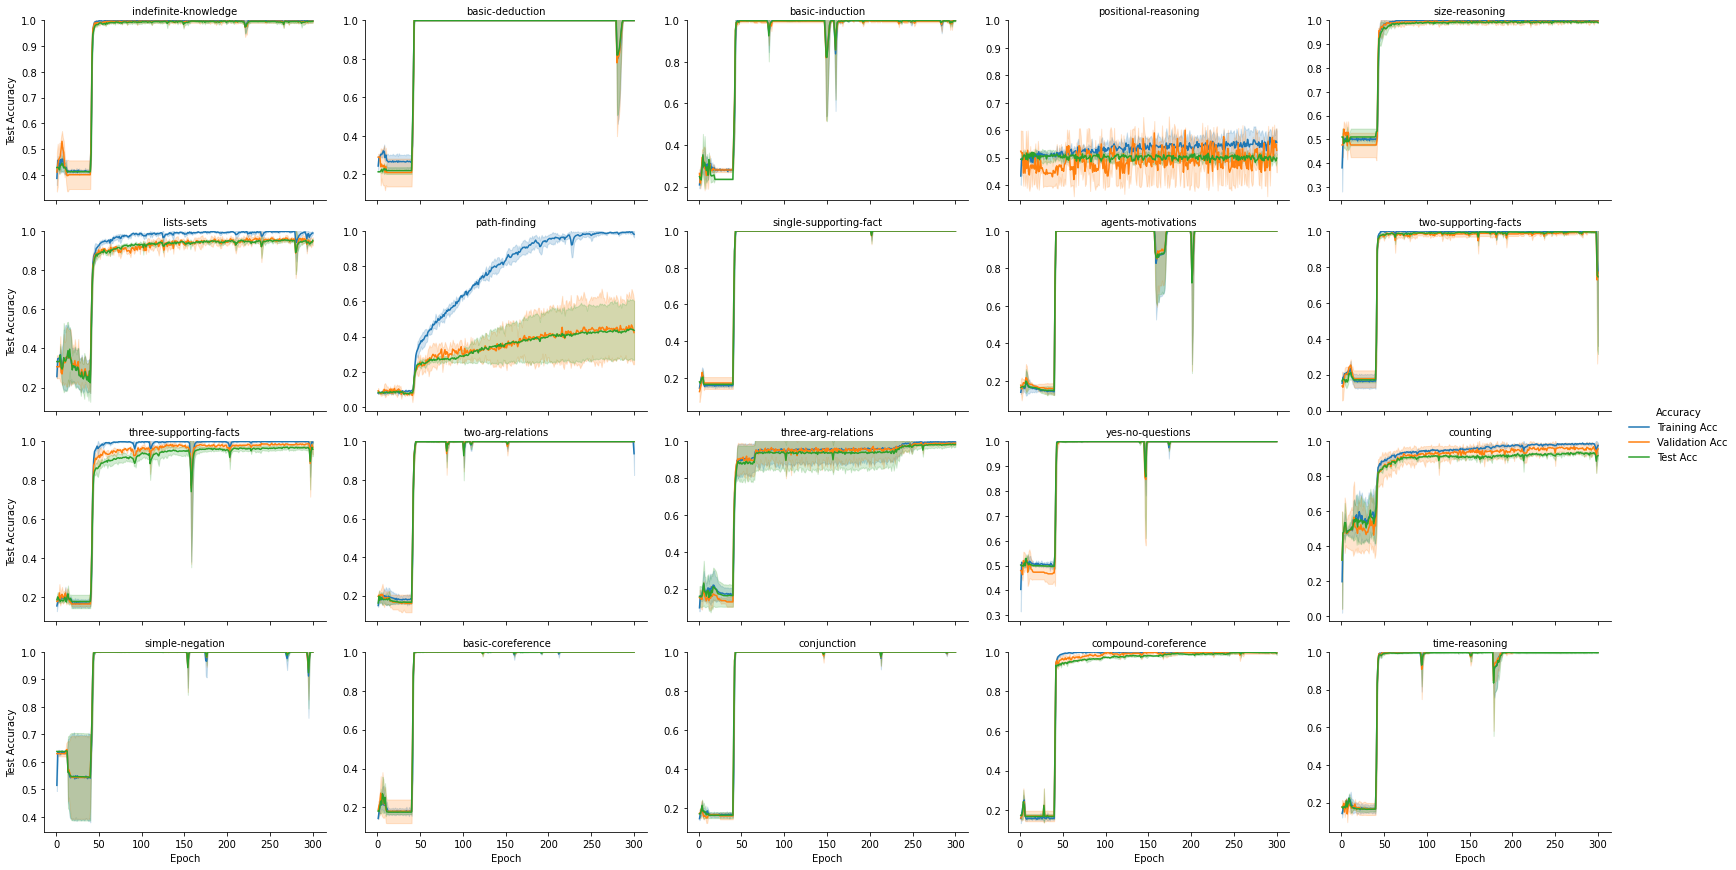

In [9]:
params = {'train_size': '1k',
          'rules': 1,
          'strong': True}
exp_data = filter_by_dict(df_umn_babi, params)
exp_data = exp_data.rename(columns={'main/acc': 'Training Acc', 'val/main/acc': 'Validation Acc', 'test/main/acc': 'Test Acc'})
exp_melt_data = exp_data.melt(id_vars=['task', 'epoch'], value_vars=['Training Acc', 'Validation Acc', 'Test Acc'], var_name='Accuracy')
exp_melt_data = exp_melt_data.assign(task_name=exp_melt_data.task.str.extract(r'_([a-z-]+)_train'))
# Plot the test accuracy
g = sns.relplot(x='epoch', y='value', hue='Accuracy',
                kind='line', ci='sd', col='task_name', col_wrap=5,
                height=3, aspect=1.5, facet_kws={'sharey': False}, data=exp_melt_data)
g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.set_xlabels("Epoch")
g.set(ylim=(None, 1.0))
g.savefig("results/babi_umn_training_curves.pdf", bbox_inches='tight')

## bAbI Inspection
Now we are interested in what the model has learnt in terms of invariants as well as how the variables unify with new values. This section first looks at extracting the invariant from the post-training output pickle file, amongst other things, contains the variable map. Note again that invariants are referred to as rules in this section of the code.

In [10]:
params = {'train_size': '1k',
          'rules': 1,
          'strong': True,
          'task_id': 16}
exp_data = filter_by_dict(df_umn_babi, params)
exp_names = exp_data.name.unique() # File names of the experiments that match parameters above
exp_name = exp_names[0] # Pick one
print("Experiment Name:", exp_name)
# Load experiment pickle file for inspection
with open(f'results/umn_result/{exp_name}_out.pickle', 'rb') as f:
    exp_out = pickle.load(f)
exp_out.keys()

Experiment Name: 120


dict_keys(['debug_enc_stories', 'debug_stories', 'answer', 'vrules', 'rules', 'model_log'])

Find which symbols are recognised as variables. We threshold variable map to determine which symbols are variables and present them with `V:symbol` notation.

In [11]:
rule_id = 0 # Investigate the first rule in the respository
story_id = 0 # Investigate how the first story is solved from the debug_stories
# Extract out the rule
vmap_thresh = exp_out['model_log']['vmap'][0][rule_id].array > 0.1 # (V,) tells us which symbols are variables
vmap_syms = np.flatnonzero(vmap_thresh) # Symbol ids that are variables
print("Variable symbols are:", vmap_syms)
body_atts = np.stack([v.array for v in exp_out['model_log']['raw_body_att']], 1) # (R, I, Ps)
body_atts = np.argmax(body_atts, -1)[rule_id] # (I,) of the context in the rule, which sentences are used
# Print the context with variables replaced
print("---")
body_rule_sents = list()
for i in body_atts:
    enc_sentence = exp_out['vrules'][0][rule_id, i]
    str_sentence = exp_out['rules'][0][rule_id, i]
    rule_sent = ['V:'+str_sentence[j] if s in vmap_syms else str_sentence[j] for j, s in enumerate(enc_sentence) if s != 0]
    body_rule_sents.append(rule_sent)
    print(' '.join(rule_sent))
print("---------")
enc_sentence = exp_out['vrules'][1][rule_id]
str_sentence = exp_out['rules'][1][rule_id]
print(' '.join(['V:'+str_sentence[j] if s in vmap_syms else str_sentence[j] for j, s in enumerate(enc_sentence) if s != 0]))
print("---------")
print(exp_out['rules'][2][rule_id][0])

Variable symbols are: [ 2  9 13 18]
---
V:lily is a V:lion
V:greg is a V:lion
V:greg is V:yellow
---------
what color is V:lily
---------
yellow


In [12]:
print(exp_out['model_log'].keys())

dict_keys(['vmap', 'q_uniatt', 'uniloss', 'uni_att', 'raw_body_att', 'raw_uni_cands_att', 'raw_orig_cands_att', 'rpred', 'opred'])


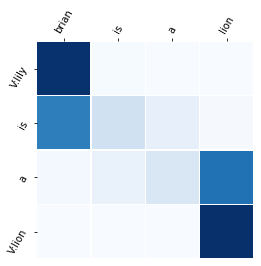

In [13]:
context_atts = np.stack([v.array for v in exp_out['model_log']['raw_uni_cands_att']], 1) # (B, I, Cs)
context_atts = np.argmax(context_atts, -1)[story_id] # (I,) tells us which context sentences are selected in the new story
iteration_id = 0 # which iteration to visualise
# Unification maps
uni_att = exp_out['model_log']['uni_att'][iteration_id][story_id, rule_id, body_atts[iteration_id], :, context_atts[iteration_id]].array
ylabels = body_rule_sents[iteration_id] # sentence of that rule
xlabels = exp_out['debug_stories'][0][story_id, context_atts[iteration_id]] # sentences of the story
ax = sns.heatmap(uni_att, vmin=0, vmax=1, annot=False,
                 linewidths=0.5,
                 cmap='Blues', cbar=False, square=True,
                 xticklabels=xlabels, yticklabels=ylabels,
                 mask=None)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
_ = plt.xticks(rotation=60)
_ = plt.yticks(rotation=60)

## The Logical Reasoning Dataset
The DeepLogic dataset generates a pair of labels for each logic program, one positive and one negative. So in total there are 2n many data points. The logical reasoning dataset files start with `deeplogic` which we use to filter out the rows. In this case each row corresponds to the metrics recorded at a particular epoch.

In [14]:
df_umn_logic = df_umn[df_umn.task.str.contains("deeplogic")]
df_umn_logic = df_umn_logic.assign(task_id=df_umn_logic.task.str.extract(r'_task(\d{1,2})').astype(int),
                                   #train_size=df_umn_logic.task.str.extract(r'_(\d{1,2}k)_'))
                                   train_size=np.where(df_umn_logic.train_size == 0, "2k", "100"))
DL_TASK_NAMES = np.array(['Facts', 'Unification', '1 Step', '2 Steps', '3 Steps', 'AND', 'OR', 'Transitivity', '1 Step NBF', '2 Step NBF', 'AND NBF', 'OR NBF'])
df_umn_logic = df_umn_logic.assign(task_name=DL_TASK_NAMES[df_umn_logic.task_id.values-1])
df_umn_logic.sample(5)

,elapsed_time,embed,epoch,iteration,main/acc,main/batt,main/loss,main/oacc,main/oatt,main/opred,...,val/main/oatt,val/main/opred,val/main/rpred,val/main/uatt,val/main/uni,val/main/vmap,weak,strong,task_id,task_name
80820,14355.047357,32,121,1702,1.000000,7.373946e-06,0.000603,1.000000,0.000038,0.000374,...,1.836642,3.301960,0.000283,2.753327,0.083366,0.379294,False,True,3,1 Step
105941,16877.365883,32,42,591,0.965402,4.091574e-04,0.099019,1.000000,0.013452,0.009729,...,2.813161,1.891353,0.016806,3.301266,0.065211,26.838539,False,True,8,Transitivity
106177,123214.304832,32,278,3910,0.998884,1.787856e-05,0.010750,0.998884,0.000683,0.007194,...,3.180515,2.939833,0.001527,4.126739,0.100597,0.146976,False,True,8,Transitivity
77000,23240.555122,32,201,5654,1.000000,0.000000e+00,0.004708,1.000000,0.002417,0.000540,...,0.264053,2.460273,0.000031,0.168476,0.054945,0.831731,False,True,3,1 Step
96897,56323.595625,32,298,8382,0.996652,3.405980e-08,0.023830,1.000000,0.005593,0.004084,...,0.189451,0.135947,0.000056,0.181250,0.030036,1.948051,False,True,7,OR


For each experiment configuration, we are taking the test accuracy when the validation loss is the lowest. Note that we take the best results out of 3 runs following previous work.

In [15]:
sorted_logic = df_umn_logic.sort_values(by=['val/main/acc', 'val/main/loss'], ascending=[False, True])
best_val_logic = sorted_logic.groupby(['task_id', 'train_size', 'rules', 'strong', 'runc']).first()
best_test_logic = best_val_logic['test/main/acc'].reset_index()
max_logic = pd.pivot_table(best_test_logic, values=['test/main/acc'], index=['task_id'], columns=['train_size', 'strong', 'rules'], aggfunc=['max'])
error_logic = ((1-max_logic)*100).round(1).rename(columns={'test/main/acc': 'test_error'})
error_logic

max                        
           test_error                        
train_size        100    2k                  
strong          True  False       True       
rules               3     1     3     1     3
task_id                                      
1                37.0   1.6   0.9   0.2   0.3
2                45.0   2.4   3.0   2.1   8.8
3                49.2  48.9  45.2  21.1  18.7
4                48.4  49.7  49.1  37.6  36.9
5                46.6  48.9  49.9  35.4  36.9
6                48.7  35.1  35.6  16.4  18.9
7                45.9  37.2  38.1  32.3  32.9
8                49.4  50.0  50.0  25.5  23.2
9                46.8  30.8  30.8  19.6  23.2
10               49.0  49.9  50.0  38.8  48.0
11               49.4  48.5  48.6  49.8  49.7
12               49.7  49.2  50.4  49.8  50.0

In [16]:
xt = error_logic.mean(axis=0) # Mean across all tasks
yt = (error_logic > 5).sum(axis=0) # Number of tasks that were not solved
pd.concat([xt, yt], axis=1).rename(columns={0: 'Mean', 1: '# >5'}).round(1).T

max                        
           test_error                        
train_size        100    2k                  
strong          True  False       True       
rules               3     1     3     1     3
Mean             47.1  37.7  37.6  27.4  29.0
# >5             12.0  10.0  10.0  10.0  11.0

## Logic Training Curves
Given an experiment number print the parameters and plot the training curves. Here each configuration has 3 runs for which we plot the training, validation and test accuracies.

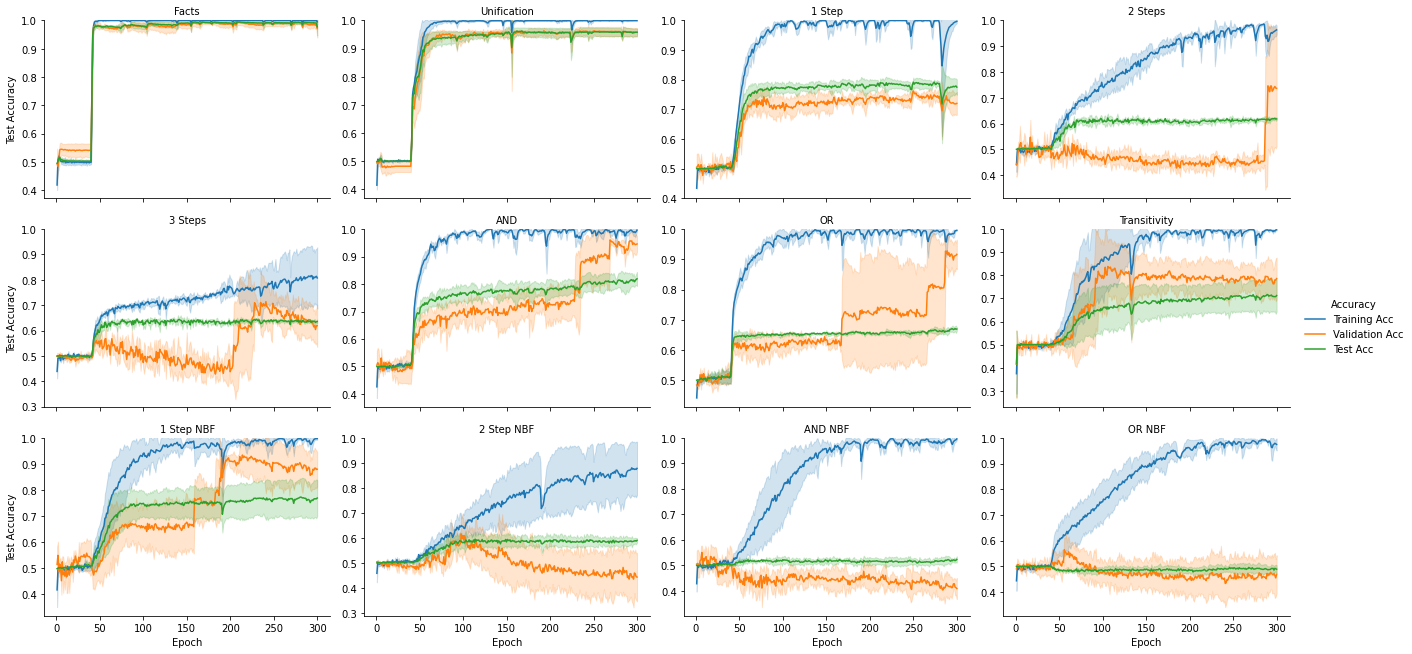

In [17]:
params = {'train_size': '2k',
          'rules': 1,
          'strong': True}
exp_data = filter_by_dict(df_umn_logic, params)
exp_data = exp_data.rename(columns={'main/acc': 'Training Acc', 'val/main/acc': 'Validation Acc', 'test/main/acc': 'Test Acc'})
exp_melt_data = exp_data.melt(id_vars=['task_name', 'epoch'], value_vars=['Training Acc', 'Validation Acc', 'Test Acc'], var_name='Accuracy')
# Plot the test accuracy
g = sns.relplot(x='epoch', y='value', hue='Accuracy',
                kind='line', ci='sd', col='task_name', col_wrap=4,
                height=3, aspect=1.5, facet_kws={'sharey': False}, data=exp_melt_data)
g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.set_xlabels("Epoch")
g.set(ylim=(None, 1.0))
g.savefig("results/dl_umn_training_curves.pdf", bbox_inches='tight')

## Logic Inspection
In this section, for a particular configuration of the model, we investigate the learnt invariants and their attention maps. Each experiment run saves an output pickle, amongst many things, contains the variable and attention maps for the invariants.

In [18]:
params = {'train_size': '2k',
          'rules': 1,
          'strong': True,
          'task_id': 3}
exp_data = filter_by_dict(df_umn_logic, params)
exp_names = exp_data.name.unique() # File names of the experiments that match parameters above
exp_name = exp_names[1] # Pick one
print("Experiment Name:", exp_name)
# Load experiment pickle file for inspection
with open(f'results/umn_result/{exp_name}_out.pickle', 'rb') as f:
    exp_out = pickle.load(f)
exp_out.keys()

Experiment Name: 332


dict_keys(['debug_enc_stories', 'debug_stories', 'answer', 'vrules', 'rules', 'model_log'])

In [19]:
rule_id = 0 # Investigate the first rule in the respository
story_id = 0 # Investigate how the first story is solved from the debug_stories
# Extract out the rule
vmap = exp_out['model_log']['vmap'][0][rule_id].array # (V,) is \psi(s)
threshold = vmap[exp_out['vrules'][1][rule_id]].mean() # Mean value of variablesness of query symbols as a heuristic
print("Threshold:", threshold)
vmap_thresh =  vmap > vmap[exp_out['vrules'][1][rule_id]].mean() # (V,) tells us which symbols are variables
vmap_syms = np.flatnonzero(vmap_thresh) # Symbol ids that are variables
print("Variable symbols are:", vmap_syms)
body_atts = np.stack([v.array for v in exp_out['model_log']['raw_body_att']], 1) # (R, I, Ps)
body_atts = np.argmax(body_atts, -1)[rule_id] # (I,) of the context in the rule, which sentences are used
# Print the context with variables replaced
print("---")
for i in body_atts:
    enc_sentence = exp_out['vrules'][0][rule_id, i]
    str_sentence = exp_out['rules'][0][rule_id, i]
    print(' '.join(['V:'+str_sentence[j] if s in vmap_syms else str_sentence[j] for j, s in enumerate(enc_sentence) if s != 0]))
print("---------")
enc_sentence = exp_out['vrules'][1][rule_id]
str_sentence = exp_out['rules'][1][rule_id]
q_rule_sent = ['V:'+str_sentence[j] if s in vmap_syms else str_sentence[j] for j, s in enumerate(enc_sentence) if s != 0]
print(' '.join(q_rule_sent))
print("---------")
print(exp_out['rules'][2][rule_id][0])

Threshold: 0.25145477
Variable symbols are: [20 25 31 47]
---
V:l ( Y , W ) < V:s ( Y , W )
V:s ( V:y , V:o )
---------
V:l ( V:y , V:o )
---------
1


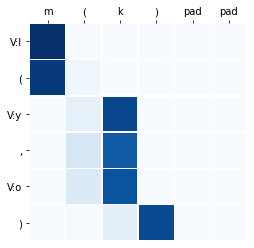

In [20]:
# Unification maps
uni_att = exp_out['model_log']['q_uniatt'][0][story_id, rule_id].array
ylabels = q_rule_sent # query of that rule
xlabels = exp_out['debug_stories'][1][story_id] # query of the story
ax = sns.heatmap(uni_att, vmin=0, vmax=1, annot=False,
                 linewidths=0.5,
                 cmap='Blues', cbar=False, square=True,
                 xticklabels=xlabels, yticklabels=ylabels,
                 mask=None)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
_ = plt.xticks(rotation='horizontal')
_ = plt.yticks(rotation='horizontal')

In this case, we observe the many to one unification where an arity 2 query is unified with arity 1. This is one the cases further discussed in the Analysis section of the paper.

### How consistent is the model in learning these invariants?
Since the logical reasoning dataset has a clear structure, we can assess whether the model *strictly* recognises only the predicate and constant symbols. As discussed in the paper, our approach can recognise more or less variables than the exact desired number but still be able to solve the task. In this case, we are looking specifically for patterns V(V) or V(V,V) if the query is arity 1 or arity 2 respectively.

In [21]:
def correct_umn_logic_invs(strong=True):
    """Compute how many invariants have *exactly* captured the desired pattern."""
    params = {'train_size': '2k',
              'rules': 1,  # It is difficult analyse when there are more than 1 rule because of the attention over the rules, the model could be using a mixture of rules
              'strong': strong}
    exp_data = filter_by_dict(df_umn_logic, params)
    exp_names = exp_data.name.unique() # File names of the experiments that match parameters above
    exp_outs = list()
    # Load experiment pickle file for inspection
    for exp_name in exp_names:
        with open(f'results/umn_result/{exp_name}_out.pickle', 'rb') as f:
            exp_outs.append(pickle.load(f))
    # For each experiment, we will check if the predicate and constants are recognised as variables
    arity1_pattern = np.array([True, False]*2) # V:p ( V:a )
    arity2_pattern = np.array([True, False]*3) # V:p ( V:a , V:b )
    num_correct = 0
    for exp_out in exp_outs:
        enc_query = exp_out['vrules'][1][0] # (Q,)
        vmap = exp_out['model_log']['vmap'][0][0].array
        # For a correct invariant, we want the predicate and constant symbols to have a higher
        # variableness value than the other symbols like comma
        qvmap = vmap[enc_query] # (Q,) represents variabless of p ( a )
        # If the minimum of predicate and constant symbols is greater than the other symbols
        # then we can easily threshold at a correct value giving the desired value
        pattern = arity1_pattern if enc_query.size == arity1_pattern.size else arity2_pattern
        num_correct += np.all((qvmap > qvmap.mean()) == pattern)
    params.update({
        '# Correct': num_correct,
        'Total': len(exp_outs),
        'Accuracy': round(num_correct / len(exp_outs) * 100, 1)
    })
    return params
umn_logic_correct = pd.DataFrame([correct_umn_logic_invs(s) for s in [True, False]])
umn_logic_correct

,train_size,rules,strong,# Correct,Total,Accuracy
0,2k,1,True,23,36,63.9
1,2k,1,False,7,36,19.4


# Analyse Iterative Memory Attention
Iterative Memory Attention (IMA) is a memory network based model that is designed to iterative solve a given logic program by resembling the steps of backward or forward chaining. Given enough data, it can solve nearly all the tasks by following the reasoning chain across rules. Starting with the representation of the query, at each iteration it selects a rule and updates the hidden proof state. Note that IMA leverages the information that predicates are composed of characters and rules are composed of predicates. This allows the model to potentially exploit the *head of a rule* whithout having to learn it.

In [22]:
# Load respective data
df_ima = pd.read_csv("results/ima_results.csv")
df_ima = df_ima.assign(task_id=df_ima.task.str.extract(r'_task(\d{1,2})').astype(int),
                       train_size=df_ima.task.str.extract(r'_(\d{1,2}k)_'),
                       strong=~df_ima.weak)
df_ima = df_ima.assign(task_name=DL_TASK_NAMES[df_ima.task_id.values-1], train_size='2k') # Logic dataset generates pairs, so train_size is 2k

In [23]:
sorted_ima = df_ima.sort_values(by=['val/main/acc', 'val/main/loss'], ascending=[False, True])
best_val_ima = sorted_ima.groupby(['task_id', 'train_size', 'strong', 'runc']).first()
best_test_ima = best_val_ima['test/main/acc'].reset_index()
max_ima = pd.pivot_table(best_test_ima, values=['test/main/acc'], index=['task_id'], columns=['train_size', 'strong'], aggfunc=['max'])
error_ima = ((1-max_ima)*100).round(1).rename(columns={'test/main/acc': 'test_error'})
error_ima

max      
           test_error      
train_size         2k      
strong          False True 
task_id                    
1                 2.8   3.8
2                 9.7   7.2
3                42.6  36.3
4                49.5  36.7
5                48.3  35.9
6                40.3  21.4
7                38.4  25.3
8                48.6  49.3
9                39.1  34.2
10               49.5  34.1
11               48.8  45.5
12               48.4  48.8

In [24]:
xt = error_ima.mean(axis=0) # Mean across all tasks
yt = (error_ima > 5).sum(axis=0) # Number of tasks that were not solved
pd.concat([xt, yt], axis=1).rename(columns={0: 'Mean', 1: '# >5'}).round(1).T

max      
           test_error      
train_size         2k      
strong          False True 
Mean             38.8  31.5
# >5             11.0  11.0

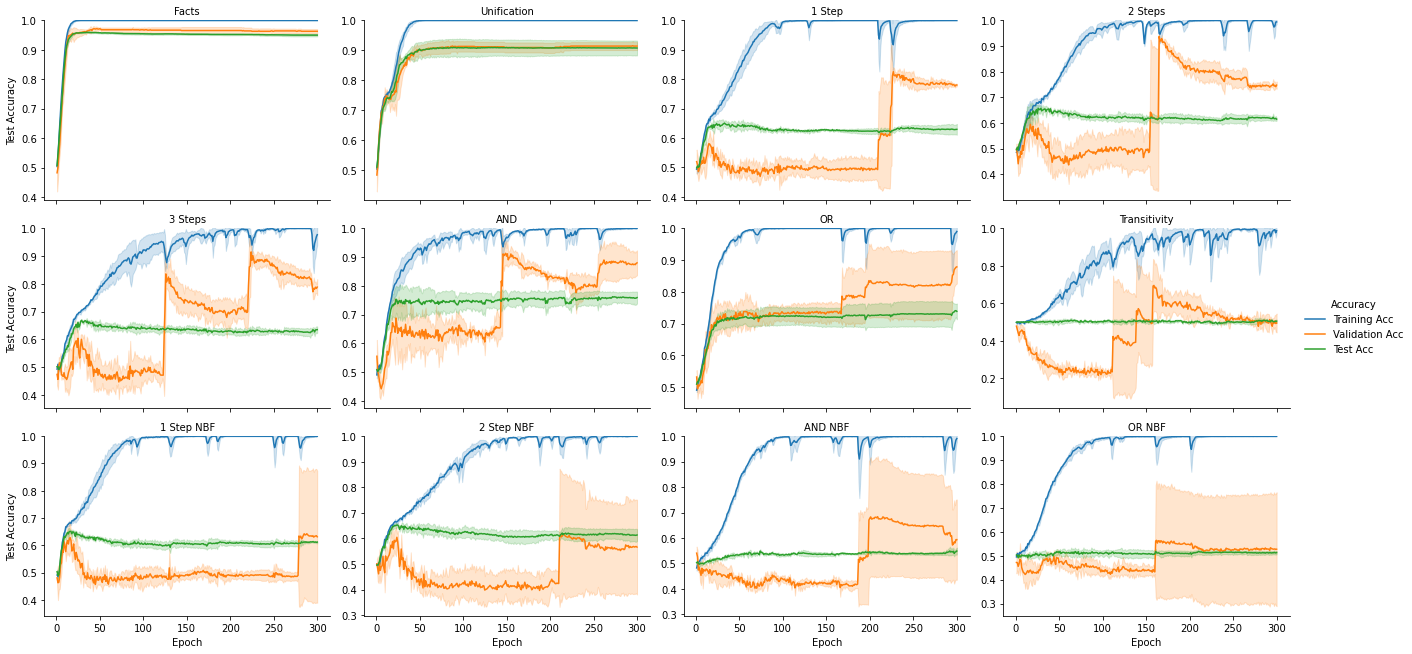

In [25]:
params = {'train_size': '2k',
          'strong': True}
exp_data = df_ima[((df_ima.train_size == params['train_size']) & (df_ima.strong == params['strong']))]
exp_data = exp_data.rename(columns={'main/acc': 'Training Acc', 'val/main/acc': 'Validation Acc', 'test/main/acc': 'Test Acc'})
exp_melt_data = exp_data.melt(id_vars=['task_name', 'epoch'], value_vars=['Training Acc', 'Validation Acc', 'Test Acc'], var_name='Accuracy')
# Plot the test accuracy
g = sns.relplot(x='epoch', y='value', hue='Accuracy',
                kind='line', ci='sd', col='task_name', col_wrap=4,
                height=3, aspect=1.5, facet_kws={'sharey': False}, data=exp_melt_data)
g.set_titles("{col_name}")
g.set_ylabels("Test Accuracy")
g.set_xlabels("Epoch")
g.set(ylim=(None, 1.0))

Here we can observe that IMA is overfitting to almost all the tasks. As the tasks get more difficult, it fails to generalise to unseen logic programs of the same structure.

## Iterative Memory Attention maps
We can visualise the iterative memory attention maps to check if the model is able to select the correct rules. Especially in the strongly supervised case, we would expect the model to be able to select the correct rules following the supervised chain. However, it might not be able to solve the task since beyond selecting the correct rules it needs to update the internal proof state which very few examples is prone to over-fitting.

In [26]:
exp_names = exp_data[exp_data.task_id == 5].name.unique()
exp_name = exp_names[1] # Pick one
print("Experiment Name:", exp_name)
# Load output pickle file
with open(f'results/ima_result/{exp_name}_out.pickle', 'rb') as f:
    exp_out = pickle.load(f)
exp_out.keys()

Experiment Name: 506


dict_keys(['debug_enc_stories', 'debug_stories', 'answer', 'model_log'])

Text(0.5, 1.0, 'Query: h(e) - Answer: False - Target: True')

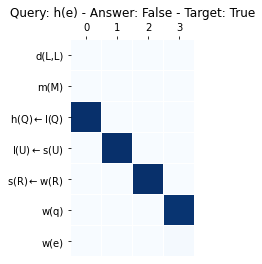

In [27]:
story_id = 2 # Debug story to analyse
context_atts = np.stack([v.array for v in exp_out['model_log']['att']], 1) # (B, I, Cs)
context_att = context_atts[story_id].T # (Cs, I)
# Plot which rules the model has attended to
xlabels = np.arange(context_att.shape[1]) # (I,)
ylabels = exp_out['debug_stories'][0][story_id] # Context rules list of list of list of characters
ylabels = [[''.join([char for char in pred if char != 'pad']) for pred in rule] for rule in ylabels] # Merge predicate characters
ylabels = [rule[0] if sum([bool(pred) for pred in rule]) == 1 else rule[0] + '$\leftarrow$' + ','.join(rule[1:]) for rule in ylabels]
ax = sns.heatmap(context_att, vmin=0, vmax=1, annot=False, linewidths=0.5,
                 cmap='Blues', cbar=False, square=True,
                 xticklabels=xlabels, yticklabels=ylabels, mask=None)
ax.xaxis.set_ticks_position('top')
ax.yaxis.set_ticks_position('left')
_ = plt.xticks(rotation='horizontal')
_ = plt.yticks(rotation='horizontal')
q_string = ''.join([c for c in exp_out['debug_stories'][1][story_id] if c != 'pad'])
plt.title(f"Query: {q_string} - Answer: {exp_out['answer'][story_id] > 0} - Target: {bool(exp_out['debug_stories'][2][story_id])}")